In [3]:
import numpy as np
import numpy.linalg as la


import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# Computing the SVD

## 1) For a square matrix

In [ ]:
m = 4
n = m
A = np.random.randn(m, n)
print(A)

### Using numpy.linalg.svd

In [ ]:
U, S, Vt = la.svd(A)

### Using eigen-decomposition

Now compute the eigenvalues and eigenvectors of $A^TA$ as `eigvals` and `eigvecs`

In [ ]:
eigvals, eigvecs = la.eig(A.T.dot(A))

Eigenvalues are real and positive. Coincidence?

In [ ]:
eigvals

`eigvecs` are orthonormal! Check:

In [ ]:
eigvecs.T @ eigvecs 

Now piece together the SVD:

## 2) For a non-square square matrix

In [ ]:
m = 3
n = 5
A = np.random.randn(m, n)
print(A)

You can obtain the SVD in the full format using `full_matrices=True` (full_matrices=True is the default value)

In [ ]:
U, S, Vt = la.svd(A,full_matrices=True)

In [ ]:
print(U)
print(U.shape)

print(Vt)
print(Vt.T.shape)

print(S)
print(S.shape)

Check the eigen decomposition:

Or you can use get the reduced form of the SVD:

In [ ]:
U, S, Vt = la.svd(A,full_matrices=False)

In [ ]:
print('A = ', A.shape)
print('U = ', U.shape)
print('S = ', S.shape)
print('V = ', Vt.T.shape)

# Relative cost of matrix factorizations

In [4]:
import numpy.linalg as npla
import scipy.linalg as spla
from time import time

In [5]:
n_values = np.logspace(1,3.5,10).astype(np.int32)
n_values

array([  10,   18,   35,   68,  129,  244,  464,  879, 1668, 3162],
      dtype=int32)

-----> lu
10 - 0.000668
18 - 0.000877
35 - 0.004121
68 - 0.000440
129 - 0.000610
244 - 0.003888
464 - 0.003940
879 - 0.015012
1668 - 0.077643
3162 - 0.566066
-----> matmat
10 - 0.000070
18 - 0.000014
35 - 0.000041
68 - 0.000410
129 - 0.000496
244 - 0.000580
464 - 0.003980
879 - 0.026417
1668 - 0.166978
3162 - 1.219371
-----> svd
10 - 0.001553
18 - 0.000115
35 - 0.000930
68 - 0.001992
129 - 0.003608
244 - 0.009391
464 - 0.044017
879 - 0.238289
1668 - 1.576543
3162 - 9.568103


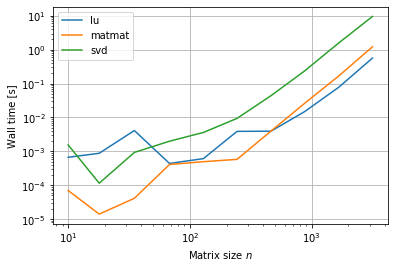

In [6]:
def matmat(A):
    A @ A

for name, f in [
        ("lu", spla.lu_factor),
        ("matmat", matmat),
        ("svd", npla.svd)
        ]:

    times = []
    print("----->", name)
    
    for n in n_values:
        A = np.random.randn(n, n)
        
        start_time = time()
        f(A)
        delta_time = time() - start_time
        times.append(delta_time)
        
        print("%d - %f" % (n, delta_time))
        
    plt.loglog(n_values, times, label=name)

plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]");
plt.grid();

# SVD Applications

## 1) Rank of a matrix 

Creating matrices for the examples:

In [ ]:
m = 6
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)







## 2) Low-rank approximations

In [ ]:
with Image.open("figures/quad.jpg") as img:
    rgb_img = np.array(img)
rgb_img.shape

In [ ]:
img = np.sum(rgb_img, axis=-1)
img.shape

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img, cmap="gray")

In [ ]:
u, sigma, vt = np.linalg.svd(img)
print('A = ', img.shape)
print('U = ', u.shape)
print('S = ', sigma.shape)
print('V.T = ', vt.shape)

In [ ]:
plt.plot(sigma, lw=4)
plt.xlabel('singular value index')
plt.ylabel('singular values')

In [ ]:
plt.loglog(sigma, lw=4)
plt.xlabel('singular value index')
plt.ylabel('singular values')

Write the matrix $A$ as a linear combination of the outer products of right and left singular vectors:

Another approach

In [ ]:
k=50
compressed_img = u[:,:k+1] @ np.diag(sigma[:k+1]) @ vt[:k+1,:]
plt.figure(figsize=(20,10))
plt.imshow(compressed_img, cmap="gray")

What is the error of the low rank approximation?

In [ ]:
error = la.norm(img - compressed_img,2)
print(error)

In [ ]:
sigma[k:k+3]

Low rank approximation is a method for image compression:

In [ ]:
original_size = img.size
compressed_size = u[:,:k].size + sigma[:k].size + vt[:k,:].size
print("original size: %d" % original_size)
print("compressed size: %d" % compressed_size)
print("ratio: %f" % (compressed_size / original_size))

## 3) Pseudo-inverse

### Square matrices:

In [ ]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

### Rectangular matrices

In [ ]:
m = 6
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

## 4) Matrix Norms and Condition number

### Square and non-singular matrices

In [ ]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
## r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

Given the SVD of A...

In [ ]:
u,s,vt = la.svd(A)
s

... determine the eucledian norm of $A$:

... determine the eucledian norm of $A^{-1}$

... determine the condition number of $A$:

### Square and singular matrices

In [ ]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

Given the SVD of A...

In [ ]:
u,s,vt = la.svd(A)
s

... determine the eucledian norm of $A$:

... determine the eucledian norm of $A^{+}$

... determine the condition number of $A$: